# Importing the dependies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics     #measures the performance of the model

In [2]:
dataset=pd.read_csv(r"C:\Users\KUNWAR SHARMA\Documents\car data.csv")
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#checking rows and columns::
dataset.shape

(301, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#checking the number of missing values:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#checking the distribution of the categorical data
dataset["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
dataset["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
dataset["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

# encoding the categorical data

In [9]:
#encoding the fuel type:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Fuel_Type']=le.fit_transform(dataset["Fuel_Type"])

In [10]:
#encoding the Seller type:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
dataset['Seller_Type']=le1.fit_transform(dataset["Seller_Type"])

In [11]:
#encoding the Transmission:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
dataset['Transmission']=le2.fit_transform(dataset["Transmission"])

In [12]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


# Splitting the data into target

In [13]:
X = dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = dataset['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# splitting training and test data

# model training

# Linear Regression

In [22]:
# loading the linear regression model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)
lin_reg_model = LinearRegression()

In [30]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [29]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

# model evelautation

In [31]:
training_data_pred=lin_reg_model.predict(X_train)

In [35]:
#R  squared error
error_score=metrics.r2_score(Y_train,training_data_pred)
print("R squared error", error_score)

R squared error 0.8799451660493715


In [ ]:
#note:: we use accuracy test in classification wali problems but in case of regression ,we use r squared error

# visualize the actual prices and predicted values

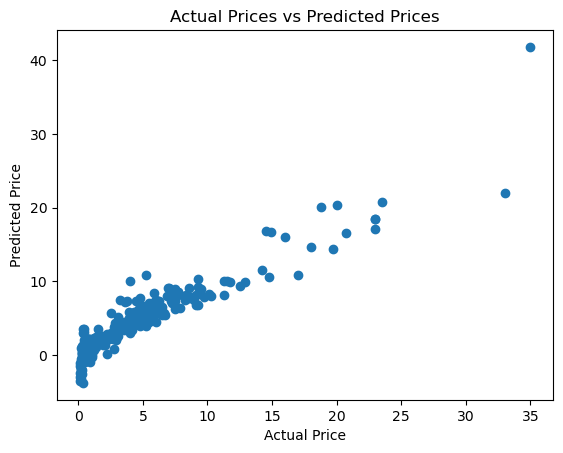

In [36]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [37]:
# prediction on Testiing data
test_data_prediction = lin_reg_model.predict(X_test)

In [39]:
#R  squared error
error_score1=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error", error_score1)

R squared error 0.8365766715025875


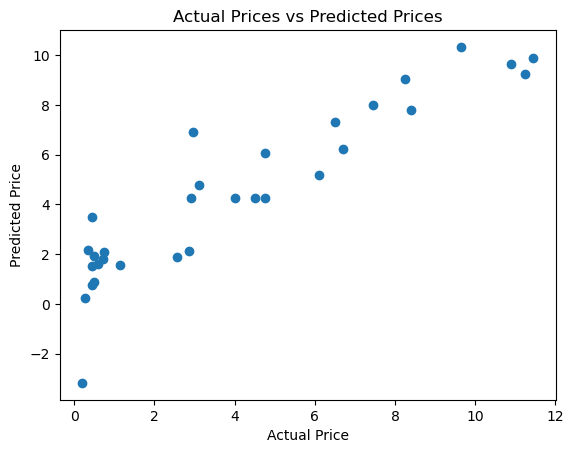

In [40]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Lasso regression

In [41]:
lasso_reg_model = Lasso()

In [43]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [49]:
# prediction on Training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [52]:
#R  squared error
error_score1=metrics.r2_score(Y_train,training_data_pred)
print("R squared error", error_score1)

R squared error 0.8799451660493715


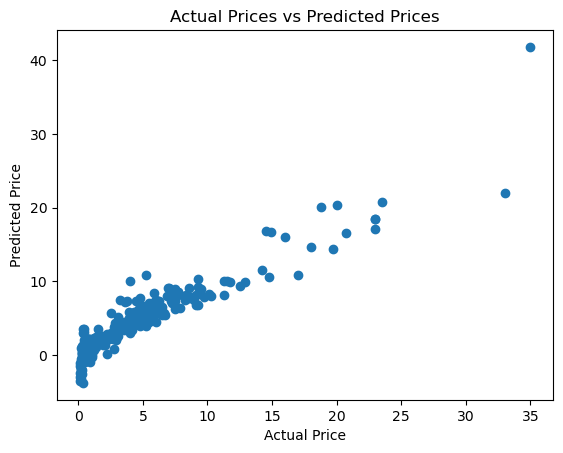

In [53]:
plt.scatter(Y_train,training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [54]:
# prediction on Testiing data
test_data_prediction = lasso_reg_model.predict(X_test)

In [55]:
#R  squared error
error_score2=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error", error_score2)

R squared error 0.8709167941173195


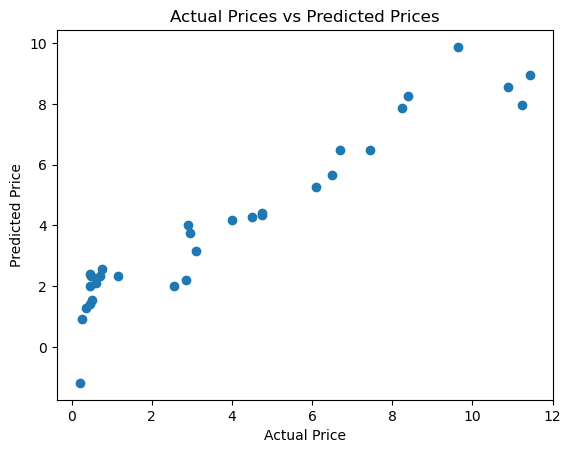

In [56]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()